In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def plot_loss(model_name):
    num_tasks = 5
    p_vals = [0.001, 0.01, 0.1, 1]
    num_p = len(p_vals)
    plt.rcParams['font.size'] = 20
    fig, ax = plt.subplots(num_p, 1, figsize = (20, 6*num_p))
    for i, p in enumerate(p_vals):
        for k in range(num_tasks):
            loss_path = f'models/{model_name}_split/{p}/train/task_{k}/loss.npy'
            loss_arr = np.load(loss_path)
            ax[i].plot(loss_arr, label = f'task {k}')
        ax[i].set_title(f'Training Loss for p = {p}')
        ax[i].set_ylabel('Cross Entropy Loss')
        ax[i].legend()
    ax[-1].set_xlabel('epoch')
    plt.tight_layout()
    plt.savefig(f'callback_plots/{model_name}_train_loss.png')
    plt.show()

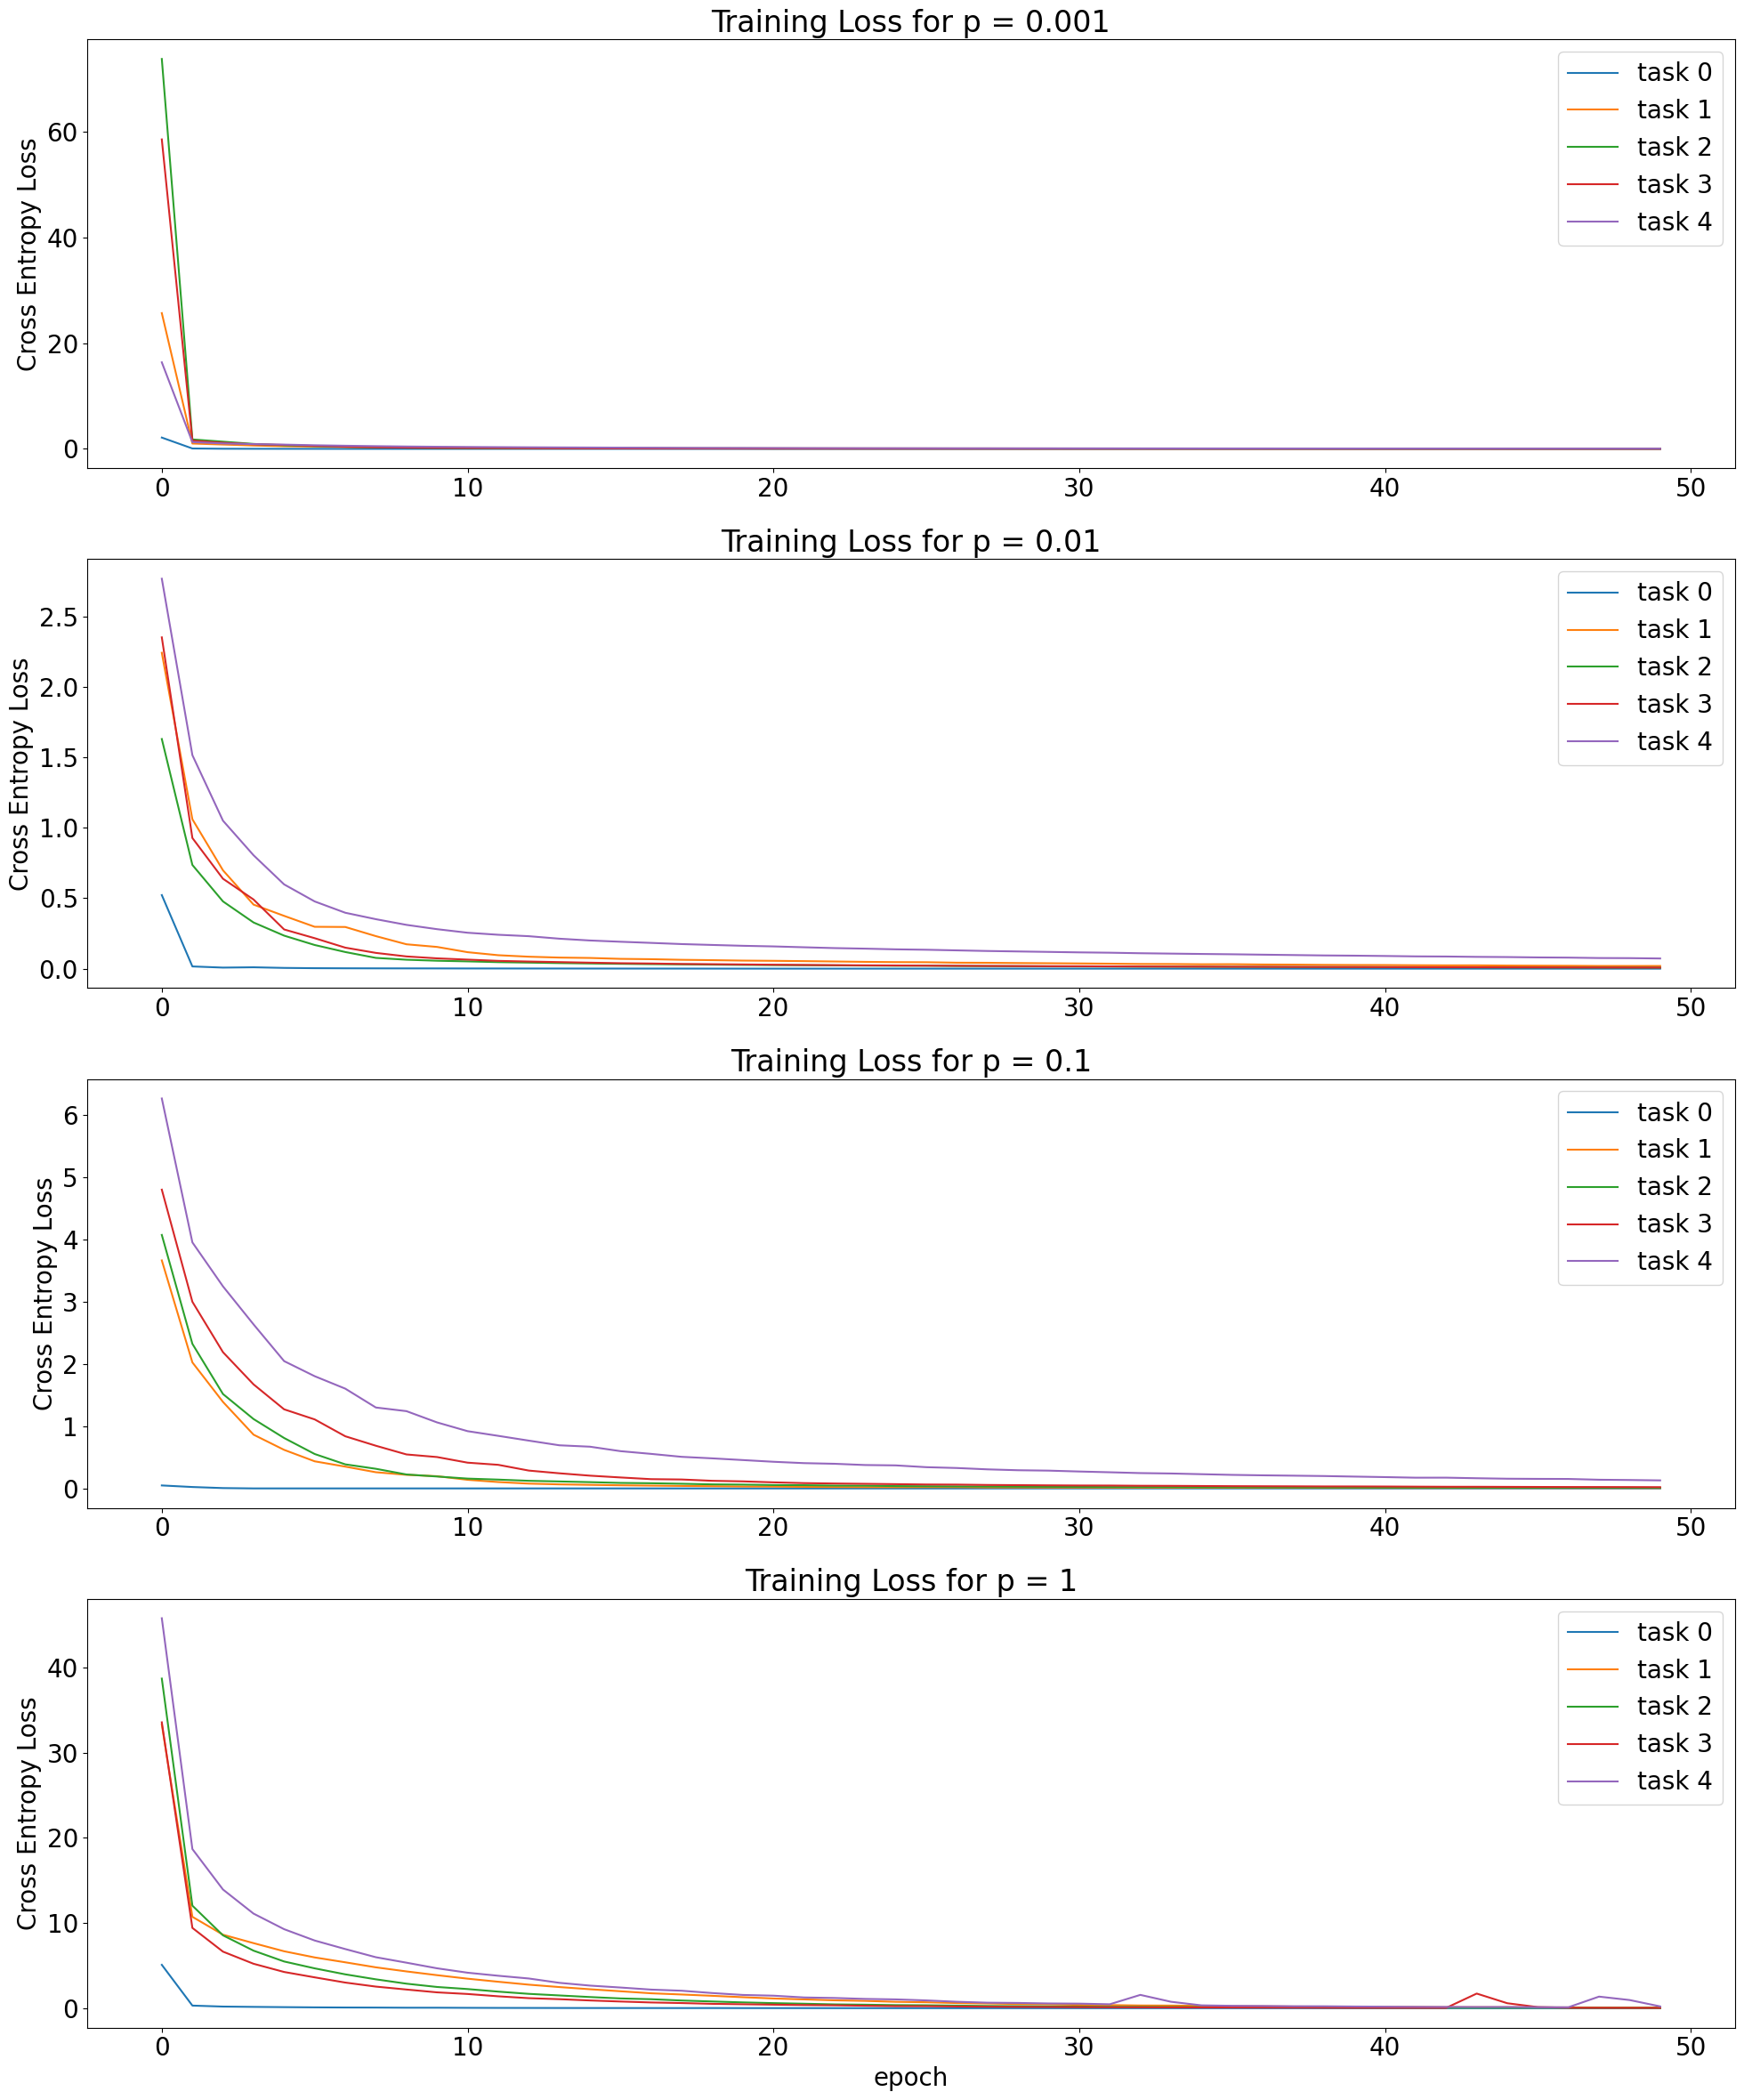

In [38]:
plot_loss('mnist')

In [42]:
def plot_avg_acc(model_name):
    p_vals = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
    avg_acc_arr = np.zeros_like(p_vals)
    plt.rcParams['font.size'] = 20
    plt.figure()
    for i, p in enumerate(p_vals):
        avg_acc_arr[i] = np.mean(np.load(f'models/{model_name}_split/{p}/train/acc.npy'))
    
    plt.plot(p_vals, avg_acc_arr)
    plt.title(f'Average accuracy vs p-value')
    plt.xlabel('P_value')
    plt.xscale('log')
    plt.ylabel('average accuracy across tasks')
    plt.savefig(f'callback_plots/{model_name}_avg_acc.png')
    plt.show()

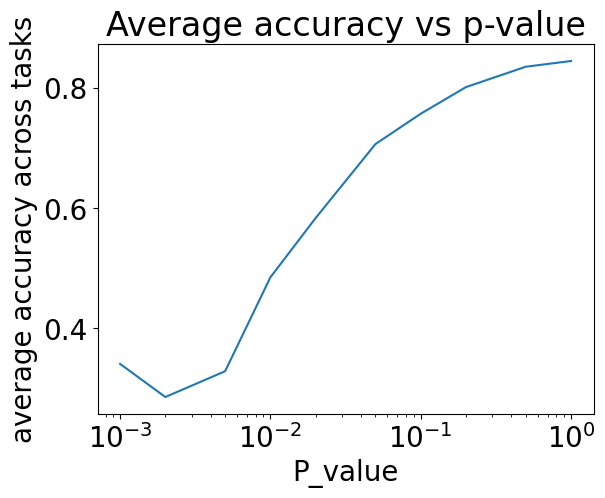

In [44]:
plot_avg_acc('cifar10')